In [1]:
import sys
sys.path.insert(1, '../../../')
import numpy as np
import gillespy2
from gillespy2 import ODESolver

In [2]:
# Brusselator system
# https://en.wikipedia.org/wiki/Brusselator
class Brusselator(gillespy2.Model):

     def __init__(self, parameter_values = None):

          # Initialize model and variables
          volume = 1000
          gillespy2.Model.__init__(self, name = "Brusselator", volume = volume)
          
          # Species
          # (C and D are inert products)
          A = gillespy2.Species(name = "A", initial_value = 100000)
          B = gillespy2.Species(name = "B", initial_value = 100000)
          C = gillespy2.Species(name = "C", initial_value = 0)
          D = gillespy2.Species(name = "D", initial_value = 0)
          X = gillespy2.Species(name = "X", initial_value = 2000)
          Y = gillespy2.Species(name = "Y", initial_value = 1000)
          self.add_species([A, B, C, D, X, Y])

          # Parameters (rates)
          rate1 = gillespy2.Parameter(name = "rate1", expression = 5000.0)
          rate2 = gillespy2.Parameter(name = "rate2", expression = 50.0)
          rate3 = gillespy2.Parameter(name = "rate3", expression = 0.00005)
          rate4 = gillespy2.Parameter(name = "rate4", expression = 5.0)
          self.add_parameter([rate1, rate2, rate3, rate4])
          
          # Reactions
          reaction1 = gillespy2.Reaction(name = "reaction1", 
                                         reactants = {A: 1}, 
                                         products = {X: 1, A: 1}, 
                                         propensity_function = "rate1")
          reaction2 = gillespy2.Reaction(name = "reaction2", 
                                         reactants = {B: 1, X: 1}, 
                                         products = {Y: 1, C: 1, B: 1}, 
                                         propensity_function = "rate2 * X")
          reaction3 = gillespy2.Reaction(name = "reaction3", 
                                         reactants = {X: 2, Y: 1}, 
                                         products = {X: 3}, 
                                         propensity_function = "rate3 * Y * X * (X - 1) / 2")
          reaction4 = gillespy2.Reaction(name = "reaction4", 
                                         reactants = {X: 1}, 
                                         products = {D: 1}, 
                                         propensity_function = "rate4 * X")
          self.add_reaction([reaction1, reaction2, reaction3, reaction4])
          
          # Set timespan of model
          self.timespan(np.linspace(0, 30, 3000))

          # Set list of species that should be plotted
          self.species_to_plot = ["X", "Y"]

In [3]:
# Oregonator system
# http://www.scholarpedia.org/article/Oregonator
class Oregonator(gillespy2.Model):

     def __init__(self, parameter_values = None):

          # Superclass initialization
          gillespy2.Model.__init__(self, name = "Oregonator")
          
          # Species
          F = gillespy2.Species(name = "F", initial_value = 2)
          A = gillespy2.Species(name = "A", initial_value = 250)
          B = gillespy2.Species(name = "B", initial_value = 500)
          C = gillespy2.Species(name = "C", initial_value = 1000)
          P = gillespy2.Species(name = "P", initial_value = 0)
          self.add_species([F, A, B, C, P])

          # Parameters (rates)
          k1 = gillespy2.Parameter(name = "k1", expression = 2.0)
          k2 = gillespy2.Parameter(name = "k2", expression = 0.1)
          k3 = gillespy2.Parameter(name = "k3", expression = 104)
          k4 = gillespy2.Parameter(name = "k4", expression = 4e-7)
          k5 = gillespy2.Parameter(name = "k5", expression = 26.0)
          self.add_parameter([k1, k2, k3, k4, k5])
          
          # Reactions
          reaction1 = gillespy2.Reaction(name = "reaction1", 
                                         reactants = {B: 1, F: 1}, 
                                         products = {A: 1, F: 1}, 
                                         rate = k1)
          reaction2 = gillespy2.Reaction(name = "reaction2", 
                                         reactants = {A: 1, B: 1}, 
                                         products = {P: 1}, 
                                         rate = k2)
          reaction3 = gillespy2.Reaction(name = "reaction3", 
                                         reactants = {A: 1, F: 1}, 
                                         products = {A: 2, C: 1, F: 1}, 
                                         rate = k3)
          reaction4 = gillespy2.Reaction(name = "reaction4", 
                                         reactants = {A: 2}, 
                                         products = {P: 1}, 
                                         rate = k4)
          reaction5 = gillespy2.Reaction(name = "reaction5", 
                                         reactants = {C: 1, F: 1}, 
                                         products = {B: 1, F: 1}, 
                                         rate = k5)
          self.add_reaction([reaction1, reaction2, reaction3, reaction4, reaction5])
          
          # Set timespan of model
          self.timespan(np.linspace(0, 3, 50))

          # Set list of species that should be plotted
          self.species_to_plot = ["A", "B", "C"]

In [4]:
model = Brusselator()

In [5]:
%time results = model.run()

Wall time: 3.18 s


In [6]:
ode_results = model.run(solver=ODESolver)

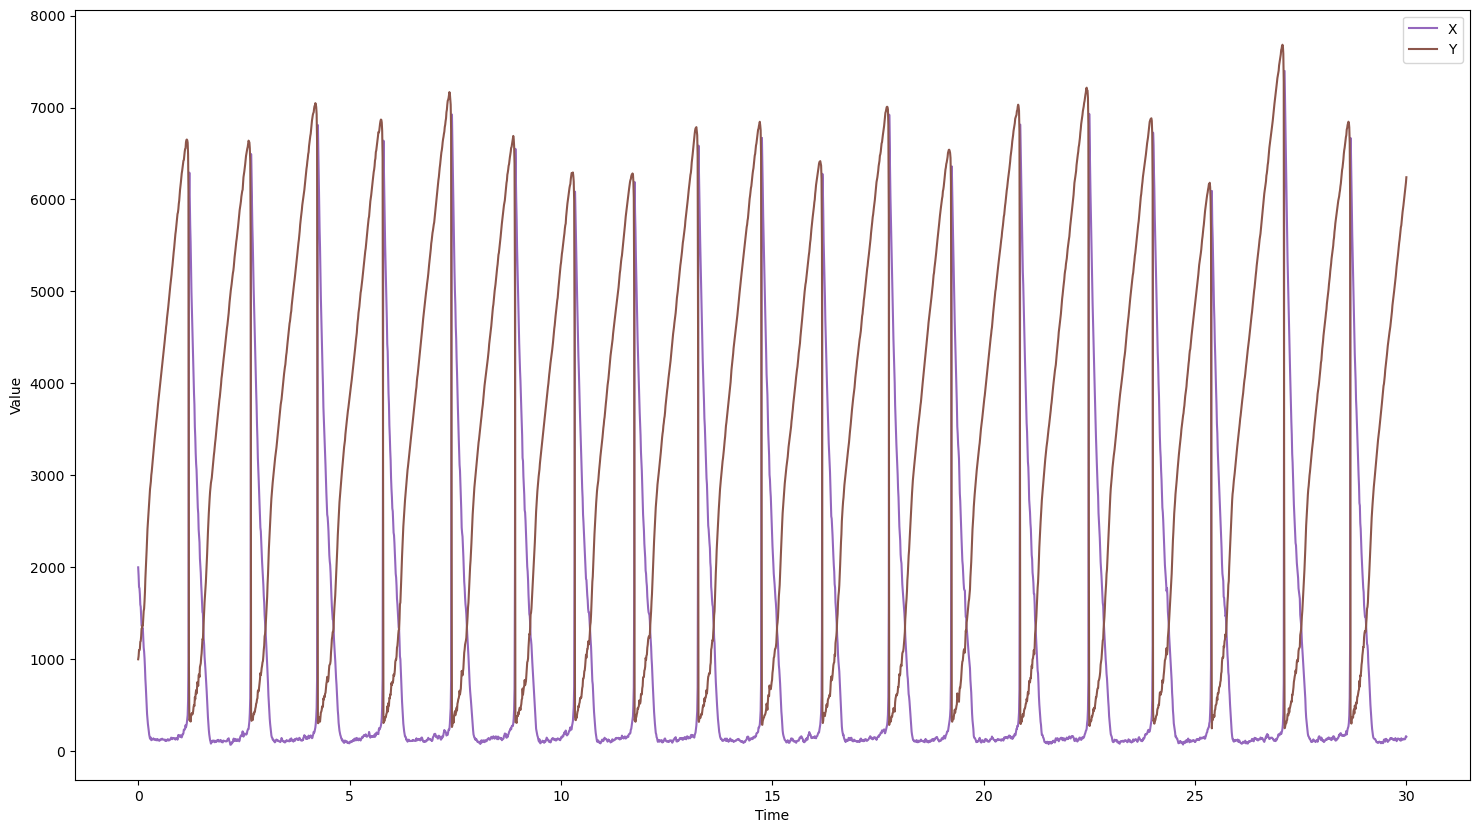

In [7]:
results.plot(included_species_list=model.species_to_plot)

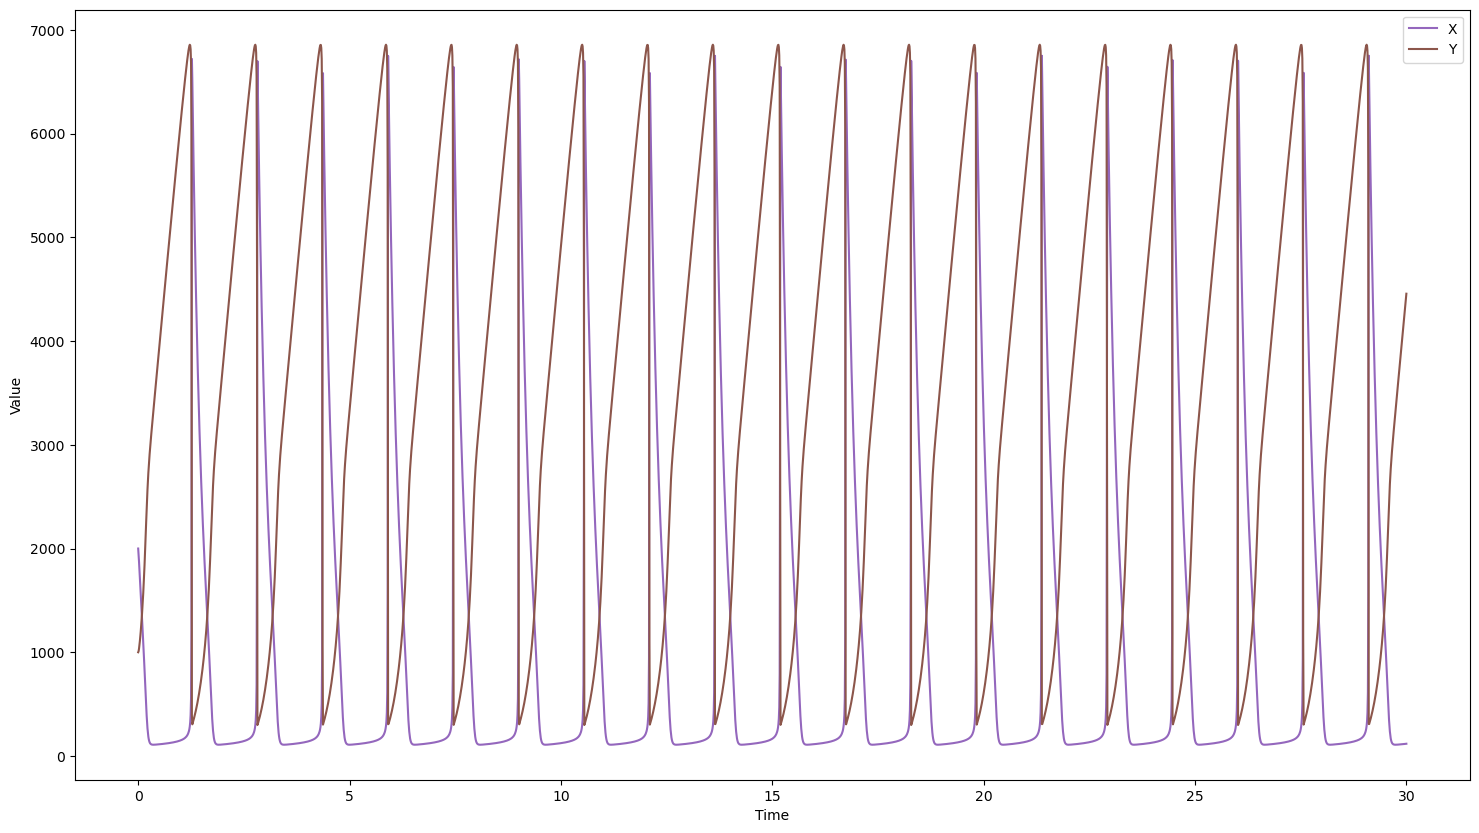

In [8]:
ode_results.plot(included_species_list=model.species_to_plot)


